In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 data = pd.read_excel('Concrete_Data.xls')
 data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis = 1)
y = data['Concrete compressive strength(MPa, megapascals) ']
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = X_train.copy(deep = True)
test = X_test.copy(deep = True)

train['Concrete compressive strength(MPa, megapascals) '] = Y_train
test['Concrete compressive strength(MPa, megapascals) '] = Y_test

X_train_scaled = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(test), columns = test.columns)

X_train_scaled['const'] = 1
X_test_scaled['const']  = 1 

X_train_final = X_train_scaled.drop(columns = ['Concrete compressive strength(MPa, megapascals) '], axis = 1)
Y_train_final = X_train_scaled['Concrete compressive strength(MPa, megapascals) ']
X_test_final =  X_test_scaled.drop(columns = ['Concrete compressive strength(MPa, megapascals) '], axis = 1)
Y_test_final = X_test_scaled['Concrete compressive strength(MPa, megapascals) ']



In [ ]:
#gradient descent from scratch
class gradient_descent:
  
  def __init__(self,num_feat):
    self.w = np.zeros(num_feat)


  def return_grad(self,X,Y,W):
    grad_vec = [] 
    for w_i in range(len(W)):
      grad_i = 0
      for i in range(len(X)):
        y_hat = np.dot(X[i],W)
        grad_i += ((y_hat - Y[i])*X[i][w_i])
      grad_vec.append(grad_i)
    try:
      a = np.array(grad_vec)/len(X)
      return a
    except:
      return np.array(grad_vec)


  def do_gradient_descent(self,alpha, X,Y,iterations):
    for i in range(iterations):
      self.w = self.w - (alpha*(self.return_grad(X,Y,self.w)))
    return self.w 
  
class mini_batch_gradient_descent(gradient_descent):
  def __init__(self,num_batches,num_feat):
    self.num_batches= num_batches
    self.w = np.zeros(num_feat)
    self.num_feat = num_feat
  
  def do_mini_gradient_descent(self,alpha,X,Y,iterations):
    for i in range(iterations):
      batch_size = len(X)//self.num_batches
      m = 0
      for batch in range(self.num_batches):
        X_b = X[m:m+batch_size]
        Y_b = Y[m:m+batch_size]
        self.w = self.do_gradient_descent(alpha, X_b,Y_b,1)
        m += (batch_size)
    return self.w

class stochastic_gradient_descent(mini_batch_gradient_descent):

  def __init__(self,num_feat):
    self.num_batches= None
    self.w = np.zeros(num_feat)
    self.num_feat = num_feat

  def do_stochastic_gradient_descent(self,alpha,X,Y,iterations):
    self.num_batches = len(X)
    self.w = self.do_mini_gradient_descent(alpha,X,Y,iterations)
    return self.w

class momentum_gradient_descent(gradient_descent):
  def __init__(self, gamma, num_feat):
    self.gamma = gamma
    self.num_feat = num_feat
    self.w = np.zeros(num_feat)
    self.prev_update = 0  
  
  def do_momentum_gradient_descent(self,alpha,X,Y,iterations):
    for i in range(iterations):
      curr_update = (self.gamma*(self.prev_update)) +(alpha*self.return_grad(X,Y,self.w))
      self.w = self.w - curr_update
      self.prev_update = curr_update
    
    return self.w

class nesterov_accelerated_gradient_descent(gradient_descent):
  def __init__(self,gamma,num_features):
    self.gamma = gamma
    self.num_feat = num_feat
    self.w = np.zeros(num_feat)
    self.prev_update = 0 
    self.w_look_ahead = None
  def do_nesterov_accelerated_gradient_descent(self,alpha,X,Y,iterations):
    for i in range(iterations):
      self.w_look_ahead = self.w - (self.gamma*self.prev_update)
      curr_update = (self.gamma*self.prev_update) + (alpha*self.return_grad(X,Y,self.w_look_ahead))
      self.w = self.w - curr_update
      self.prev_update = curr_update
    return self.w



In [ ]:
# gradient descent in pytorch
import torch
from torch.nn import Parameter

def batch_gradient_descent_pytorch(X_train_final,Y_train_final, epochs, alpha):

  X_train_torch = torch.tensor(np.array(X_train_final), dtype=torch.float)
  Y_train_torch = torch.tensor(np.array(Y_train_final), dtype=torch.float)
  weights = torch.zeros((X_train_final.shape[-1],1), requires_grad = True, dtype = float)
  for epoch in range(epochs):
     
    temp = 0
    for i in range(X_train_final.shape[-1]):
      temp += weights[i]*X_train_torch[:,i]
    y_pred = temp
    cost = torch.mean((y_pred -Y_train_torch )**2)
    cost.backward()
    with torch.no_grad():
      weights -= (alpha * weights.grad)
      weights.grad.zero_()

  return(weights)

def stochastic_gradient_descent_pytorch(X_train_final,Y_train_final, epochs, alpha):
  X_train_torch = torch.tensor(np.array(X_train_final), dtype=torch.float)
  Y_train_torch = torch.tensor(np.array(Y_train_final), dtype=torch.float)

  a = torch.zeros(1, requires_grad = True, dtype = torch.float)
  model = ([Parameter(torch.zeros(1, requires_grad = True, dtype = torch.float)) for i in range(X_train_final.shape[-1])])
  
  learning_rate = alpha
  num_epochs = epochs

  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(model, lr =  learning_rate)

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    temp = 0
    for i in range(X_train_final.shape[-1]):
      temp += model[i]*X_train_torch[:,i]
    y_pred = temp
    loss = criterion(y_pred,Y_train_torch )
    loss.backward()
    optimizer.step()


  return(model)

def mini_batch_gradient_descent_pytorch(X_train_final,Y_train_final, epochs, alpha,num_batches):
  
  weights = torch.zeros((X_train_final.shape[-1],1), requires_grad = True, dtype = float)
  for e in range(epochs):
    batch_size = len(X)//num_batches
    m = 0
    for batch in range(num_batches):
        X_b = torch.tensor(np.array(X_train_final[m:m+batch_size]), dtype = torch.float)
        Y_b = torch.tensor(np.array(Y_train_final[m:m+batch_size]), dtype = torch.float)
        temp = 0
        for i in range(X_train_final.shape[-1]):
          temp += weights[i]*X_b[:,i]
          y_pred = temp
    
        cost = torch.mean((y_pred -Y_b )**2)      
        cost.backward()
        with torch.no_grad():
          weights -= (alpha * weights.grad)       
          weights.grad.zero_()

        m += (batch_size)

  return weights

  
def momentum_gradient_descent_pytorch(X_train_final,Y_train_final, epochs, alpha,gamma):
  X_train_torch = torch.tensor(np.array(X_train_final), dtype=torch.float)
  Y_train_torch = torch.tensor(np.array(Y_train_final), dtype=torch.float)

  a = torch.zeros(1, requires_grad = True, dtype = torch.float)
  model = ([Parameter(torch.zeros(1, requires_grad = True, dtype = torch.float)) for i in range(X_train_final.shape[-1])])
  
  learning_rate = alpha
  num_epochs = epochs

  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(model, lr =  learning_rate, momentum = gamma )

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    temp = 0
    for i in range(X_train_final.shape[-1]):
      temp += model[i]*X_train_torch[:,i]
    y_pred = temp
    loss = criterion(y_pred,Y_train_torch )
    loss.backward()
    optimizer.step()


  return(model)


def nesterov_gradient_descent_pytorch(X_train_final,Y_train_final, epochs, alpha,gamma):
  X_train_torch = torch.tensor(np.array(X_train_final), dtype=torch.float)
  Y_train_torch = torch.tensor(np.array(Y_train_final), dtype=torch.float)

  a = torch.zeros(1, requires_grad = True, dtype = torch.float)
  model = ([Parameter(torch.zeros(1, requires_grad = True, dtype = torch.float)) for i in range(X_train_final.shape[-1])])
  
  learning_rate = alpha
  num_epochs = epochs

  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.SGD(model, lr =  learning_rate, momentum = gamma, nesterov= True)

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    temp = 0
    for i in range(X_train_final.shape[-1]):
      temp += model[i]*X_train_torch[:,i]
    y_pred = temp
    loss = criterion(y_pred,Y_train_torch )
    loss.backward()
    optimizer.step()


  return(model)



In [ ]:
def predictions(X_test,W):
  return np.dot(X_test,W)


def perform_inverse_transform(X_test_scaled, Y_pred,scaler):
  X_test_scaled['Concrete compressive strength(MPa, megapascals) '] = Y_pred
  X_temp = X_test_scaled.drop(columns = ['const'],axis = 1)
  Y_predictions = pd.DataFrame(scaler.inverse_transform(X_temp),columns = X_temp.columns)['Concrete compressive strength(MPa, megapascals) ']
  return Y_predictions



In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [ ]:
X_t = np.array(X_train_final)
Y_t = np.array(Y_train_final)
num_feat = X_train_final.shape[-1]
MSE_batch,MSE_mini,MSE_stoc  = [],[],[]
r2_batch,r2_mini,r2_stoc = [],[],[]
for alpha in [1e-5,1e-4,1e-3,1e-2,1e-1]:
  #tuning alpha for batch gradient descent
  grad_op = gradient_descent(num_feat)
  best_w_batch = grad_op.do_gradient_descent(alpha,X_t,Y_t,10000)
  Y_pred = predictions(X_test_final,best_w_batch)
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_batch.append(mse(Y_test,Y_predictions))
  r2_batch.append(r2_score(Y_test,Y_predictions))

  #tuning alpha for min-batch gradient descent
  grad_op = mini_batch_gradient_descent(20, num_feat)
  best_w_mini = grad_op.do_mini_gradient_descent(alpha,X_t,Y_t,1000)
  Y_pred = predictions(X_test_final,best_w_mini)
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_mini.append(mse(Y_test,Y_predictions))
  r2_mini.append(r2_score(Y_test,Y_predictions))
  
  #tuning alpha for stochastic gradient descent
  grad_op = stochastic_gradient_descent(num_feat)
  best_w_stoc = grad_op.do_stochastic_gradient_descent(alpha,X_t,Y_t,1000)
  Y_pred = predictions(X_test_final,best_w_stoc)
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_stoc.append(mse(Y_test,Y_predictions))
  r2_stoc.append(r2_score(Y_test,Y_predictions))


In [ ]:
#pytorch implementation of stochastic and mini - batch gradient

num_feat = X_train_final.shape[-1]
MSE_batch_py,MSE_mini_py,MSE_stoc_py  = [],[],[]
r2_batch_py,r2_mini_py,r2_stoc_py = [],[],[]
for alpha in [1e-5,1e-4,1e-3,1e-2,1e-1]:
  #tuning alpha for batch gradient descent
  
  best_w_batch =(batch_gradient_descent_pytorch(X_train_final,Y_train_final, 10000, alpha))
  
  Y_pred = predictions(X_test_final,best_w_batch.detach().cpu().numpy())
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_batch_py.append(mse(Y_test,Y_predictions))
  r2_batch_py.append(r2_score(Y_test,Y_predictions))

  #tuning alpha for min-batch gradient descent
 
  best_w_mini = (mini_batch_gradient_descent_pytorch(X_train_final,Y_train_final, 1000, alpha,20))
  Y_pred = predictions(X_test_final,best_w_mini.detach().cpu().numpy())
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_mini_py.append(mse(Y_test,Y_predictions))
  r2_mini_py.append(r2_score(Y_test,Y_predictions))
  
  #tuning alpha for stochastic gradient descent

  best_w_stoc = (stochastic_gradient_descent_pytorch(X_train_final,Y_train_final, 1000, alpha))
  weights = [best_w_stoc[i].detach().cpu().numpy() for i in range(len(best_w_stoc))]
  Y_pred = predictions(X_test_final,weights)
  Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
  MSE_stoc_py.append(mse(Y_test,Y_predictions))
  r2_stoc_py.append(r2_score(Y_test,Y_predictions))


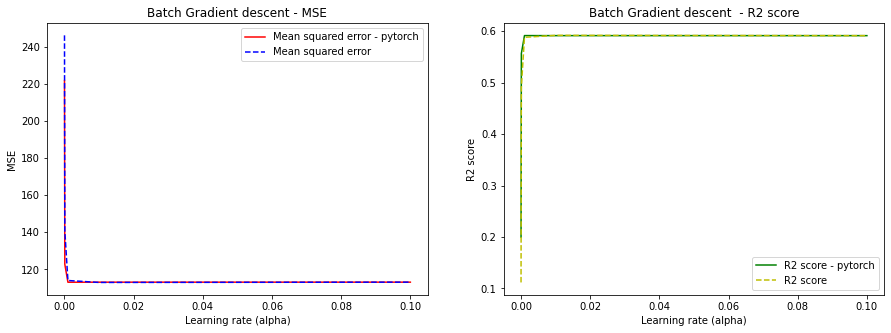

In [ ]:
import matplotlib.pyplot as plt
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1]
plt.figure(figsize= (15,5))

plt.subplot(121)
plt.title("Batch Gradient descent - MSE")
plt.plot(alphas,MSE_batch_py,'r', label = 'Mean squared error - pytorch')
plt.plot(alphas,MSE_batch,'b', label = 'Mean squared error', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("MSE")
plt.subplot(122)
plt.title("Batch Gradient descent  - R2 score")
plt.plot(alphas, r2_batch_py, 'g', label = 'R2 score - pytorch')
plt.plot(alphas, r2_batch, 'y', label = 'R2 score', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("R2 score")
plt.show()



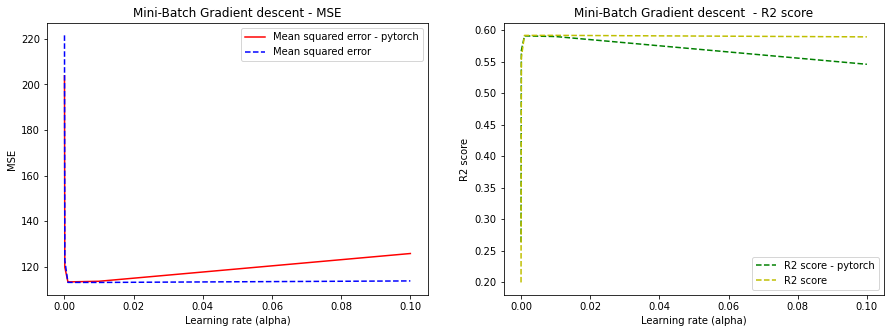

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.title("Mini-Batch Gradient descent - MSE")
plt.plot(alphas,MSE_mini_py,'r', label = 'Mean squared error - pytorch')
plt.plot(alphas, MSE_mini, 'b', label = 'Mean squared error', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("MSE")
plt.subplot(122)
plt.title("Mini-Batch Gradient descent  - R2 score")
plt.plot(alphas, r2_mini_py, 'g', label = 'R2 score - pytorch', linestyle = 'dashed')
plt.plot(alphas, r2_mini, 'y', label = 'R2 score', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("R2 score")
plt.show()

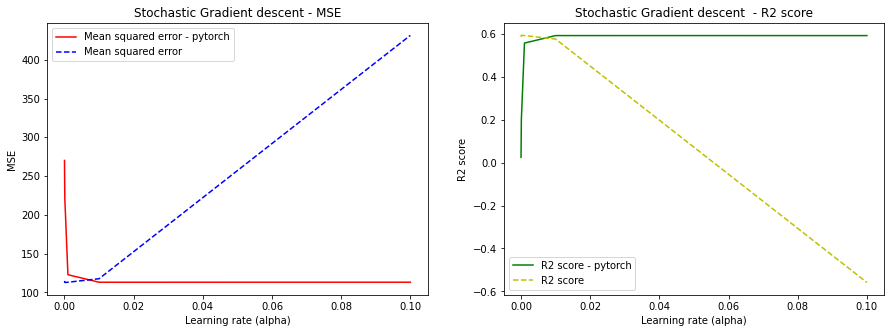

In [ ]:
plt.figure(figsize= (15,5))
plt.title("Stochastic Gradient descent")
plt.subplot(121)
plt.title("Stochastic Gradient descent - MSE")
plt.plot(alphas,MSE_stoc_py,'r', label = 'Mean squared error - pytorch')
plt.plot(alphas,MSE_stoc,'b', label = 'Mean squared error', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("MSE")
plt.subplot(122)
plt.title("Stochastic Gradient descent  - R2 score")
plt.plot(alphas, r2_stoc_py, 'g', label = 'R2 score - pytorch')
plt.plot(alphas, r2_stoc, 'y', label = 'R2 score', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("R2 score")
plt.show()

In [ ]:
X_t = np.array(X_train_final)
Y_t = np.array(Y_train_final)
MSE_momentum,MSE_nesterov  = [],[]
r2_momentum,r2_nesterov = [],[]
for alpha in [1e-5,1e-4,1e-3,1e-2,1e-1]:
    gamma =0.9
    #momemtum gradient descent
    num_feat = X_train_final.shape[-1]
    grad_op = momentum_gradient_descent(gamma,num_feat)
    X_t = np.array(X_train_final)
    Y_t = np.array(Y_train_final)
    best_w_momentum = grad_op.do_momentum_gradient_descent(alpha,X_t,Y_t,1000)
    Y_pred = predictions(X_test_final,best_w_momentum)
    Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
    MSE_momentum.append([mse(Y_test,Y_predictions),alpha,gamma])
    r2_momentum.append([r2_score(Y_test,Y_predictions),alpha,gamma])
  
    #nesterov accelerated gradient descent
    num_feat = X_train_final.shape[-1]
    grad_op = nesterov_accelerated_gradient_descent(gamma,num_feat)
    X_t = np.array(X_train_final)
    Y_t = np.array(Y_train_final)
    best_w_nesterov = grad_op.do_nesterov_accelerated_gradient_descent(alpha,X_t,Y_t,1000)
    Y_pred = predictions(X_test_final,best_w_nesterov)
    Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
    MSE_nesterov.append([mse(Y_test,Y_predictions),alpha,gamma])
    r2_nesterov.append([r2_score(Y_test,Y_predictions),alpha,gamma])
    


In [ ]:
MSE_momentum_py,MSE_nesterov_py  = [],[]
r2_momentum_py,r2_nesterov_py = [],[]
for alpha in [1e-5,1e-4,1e-3,1e-2,1e-1]:
    gamma =0.9
    #momemtum gradient descent
    num_feat = X_train_final.shape[-1]
    best_w_momentum = momentum_gradient_descent_pytorch(X_train_final,Y_train_final, 1000, alpha,gamma)
    weights = [best_w_momentum[i].detach().cpu().numpy() for i in range(len(best_w_momentum))]
    Y_pred = predictions(X_test_final,weights)
    Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
    MSE_momentum_py.append(mse(Y_test,Y_predictions))
    r2_momentum_py.append(r2_score(Y_test,Y_predictions))
  
    #nesterov accelerated gradient descent
    num_feat = X_train_final.shape[-1]
    best_w_nesterov = nesterov_gradient_descent_pytorch(X_train_final,Y_train_final, 1000, alpha,gamma)
    weights = [best_w_nesterov[i].detach().cpu().numpy() for i in range(len(best_w_nesterov))]
    Y_pred = predictions(X_test_final,weights)
    Y_predictions = perform_inverse_transform(X_test_scaled, Y_pred,scaler)
    MSE_nesterov_py.append(mse(Y_test,Y_predictions))
    r2_nesterov_py.append(r2_score(Y_test,Y_predictions))

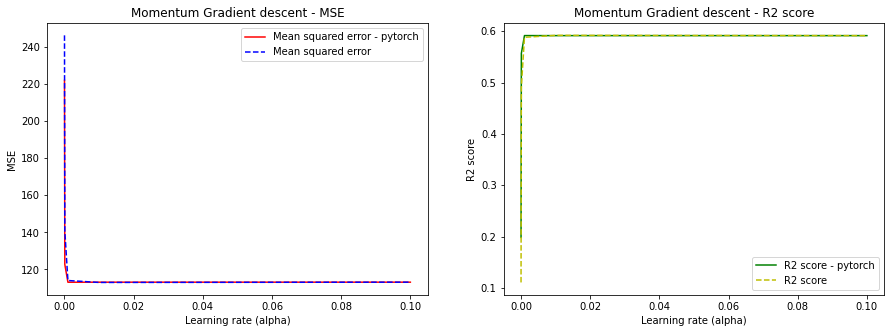

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.title("Momentum Gradient descent - MSE")
plt.plot(alphas,MSE_momentum_py,'r', label = 'Mean squared error - pytorch')
plt.plot(alphas,np.array(MSE_momentum)[:,0],'b', label = 'Mean squared error', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("MSE")
plt.subplot(122)
plt.title("Momentum Gradient descent - R2 score")
plt.plot(alphas, r2_momentum_py, 'g', label = 'R2 score - pytorch')
plt.plot(alphas, np.array(r2_momentum)[:,0], 'y', label = 'R2 score', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("R2 score")
plt.show()

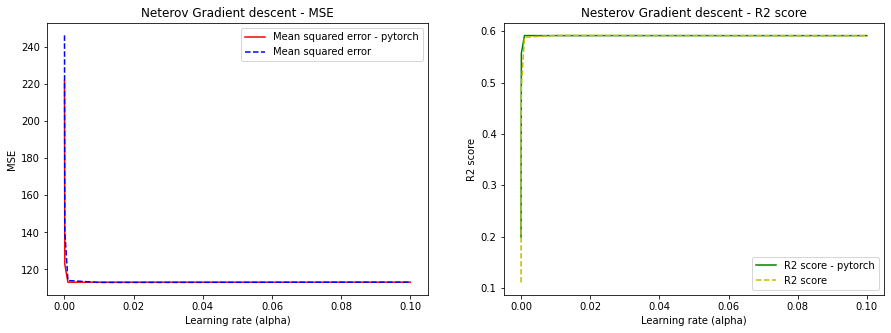

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.title("Neterov Gradient descent - MSE")
plt.plot(alphas,MSE_nesterov_py,'r', label = 'Mean squared error - pytorch')
plt.plot(alphas,np.array(MSE_nesterov)[:,0],'b', label = 'Mean squared error', linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("MSE")
plt.subplot(122)
plt.title("Nesterov Gradient descent - R2 score")
plt.plot(alphas, r2_nesterov_py, 'g', label = 'R2 score - pytorch')
plt.plot(alphas, np.array(r2_nesterov)[:,0], 'y', label = 'R2 score',linestyle = 'dashed')
plt.legend()
plt.xlabel("Learning rate (alpha)")
plt.ylabel("R2 score")
plt.show()

Let us do the analysis for un-normalized input data 

In [28]:
X_train['const'] =1
X_test['const'] = 1
X_t = np.array(X_train)
Y_t = np.array(Y_train)
num_feat = X_train_final.shape[-1]

for alpha in [1e-7,1e-5,1e-4,1e-3]:
  #tuning alpha for batch gradient descent
  grad_op = gradient_descent(num_feat)
  best_w_batch = grad_op.do_gradient_descent(alpha,X_t,Y_t,500)
  Y_predictions = predictions(X_test,best_w_batch)
  
  try:
    MSE_batch.append(mse(Y_test,Y_predictions))
    print('Batch GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )
  except:
    print("The weights are diverging for batch gradient descent for the learning rate:", alpha)

  

  #tuning alpha for min-batch gradient descent
  grad_op = mini_batch_gradient_descent(20, num_feat)
  best_w_mini = grad_op.do_mini_gradient_descent(alpha,X_t,Y_t,100)
  Y_predictions = predictions(X_test,best_w_mini)

  try:
    MSE_mini.append(mse(Y_test,Y_predictions))
    print('Mini Batch GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )
  except:
    print("The weights are diverging for mini batch gradient descent for the learning rate:", alpha)
  
  #tuning alpha for stochastic gradient descent
  grad_op = stochastic_gradient_descent(num_feat)
  best_w_stoc = grad_op.do_stochastic_gradient_descent(alpha,X_t,Y_t,100)
  Y_predictions = predictions(X_test,best_w_mini)

  try:
    MSE_stoc.append(mse(Y_test,Y_predictions))
    print('Stochastic GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )
  except:
    print("The weights are diverging for stochastic gradient descent for the learning rate:", alpha)

Batch GD,  Learning rate: 1e-07 MSE:  210.5173198513021 R2:  0.23969602461540296
Mini Batch GD,  Learning rate: 1e-07 MSE:  155.6580477898801 R2:  0.4378256733515058
Stochastic GD,  Learning rate: 1e-07 MSE:  155.6580477898801 R2:  0.4378256733515058
The weights are diverging for batch gradient descent for the learning rate: 1e-05
The weights are diverging for mini batch gradient descent for the learning rate: 1e-05
The weights are diverging for stochastic gradient descent for the learning rate: 1e-05
The weights are diverging for batch gradient descent for the learning rate: 0.0001
The weights are diverging for mini batch gradient descent for the learning rate: 0.0001
The weights are diverging for stochastic gradient descent for the learning rate: 0.0001
The weights are diverging for batch gradient descent for the learning rate: 0.001
The weights are diverging for mini batch gradient descent for the learning rate: 0.001
The weights are diverging for stochastic gradient descent for the

In [29]:
#pytorch implementation of stochastic and mini - batch gradient
print("IMPLEMENTATION IN PYTORCH")
num_feat = X_train_final.shape[-1]

for alpha in [1e-7,1e-5,1e-4,1e-3]:
  #tuning alpha for batch gradient descent
  
  best_w_batch =(batch_gradient_descent_pytorch(X_train,Y_train, 500, alpha))
  
  Y_predictions = predictions(X_test,best_w_batch.detach().cpu().numpy())
  
  try:
    MSE_batch.append(mse(Y_test,Y_predictions))
    print('Batch GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )

  except:
    print("The weights are diverging for batch gradient descent the for given learning rate:", alpha)

  

  #tuning alpha for min-batch gradient descent
 
  best_w_mini = (mini_batch_gradient_descent_pytorch(X_train,Y_train, 100, alpha,20))
  Y_predictions = predictions(X_test,best_w_mini.detach().cpu().numpy())
  
  try:
    MSE_mini.append(mse(Y_test,Y_predictions))
    print('Mini Batch GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )

  except:
    print("The weights are diverging for mini batch gradient descent for the given learning rate:", alpha)
  
  
  #tuning alpha for stochastic gradient descent

  best_w_stoc = (stochastic_gradient_descent_pytorch(X_train,Y_train, 100, alpha))
  weights = [best_w_stoc[i].detach().cpu().numpy() for i in range(len(best_w_stoc))]
  Y_predictions = predictions(X_test,weights)
  
  try:
    MSE_stoc.append(mse(Y_test,Y_predictions))
    print('Stochastic GD, ','Learning rate:', alpha, 'MSE: ',mse(Y_test,Y_predictions),'R2: ',r2_score(Y_test,Y_predictions) )

  except:
    print("The weights are diverging for stochastic gradient descent for the given learning rate:", alpha)


IMPLEMENTATION IN PYTORCH
Batch GD,  Learning rate: 1e-07 MSE:  180.47553008051855 R2:  0.34819489875330567
Mini Batch GD,  Learning rate: 1e-07 MSE:  147.48672283504183 R2:  0.46733721592534816
Stochastic GD,  Learning rate: 1e-07 MSE:  244.88975995341033 R2:  0.11555658149613313
The weights are diverging for batch gradient descent the for given learning rate: 1e-05
The weights are diverging for mini batch gradient descent for the given learning rate: 1e-05
The weights are diverging for stochastic gradient descent for the given learning rate: 1e-05
The weights are diverging for batch gradient descent the for given learning rate: 0.0001
The weights are diverging for mini batch gradient descent for the given learning rate: 0.0001
The weights are diverging for stochastic gradient descent for the given learning rate: 0.0001
The weights are diverging for batch gradient descent the for given learning rate: 0.001
The weights are diverging for mini batch gradient descent for the given learnin

Thus, from the above analysis, we conclude that input data normalization is very necessary for the weights to converge. Normalization is necessary to bring all the features to same scale which improves the performance of machine learning models. Normalization also makes the input features dimensionless and thus the resuting features can interpreted as mere numbers, which enables us to do statistical analysis, without associating any physical interpretation.

**Summary:**

1.Write a Python program to solve the linear regression problem batch
gradient descent.


1a) Implement batch gradient descent from scratch in Python, without
input data normalization. Experiment with various learning rates.
State your observations.

**Observations on implementing Batch Gradient descent without input data normalization:** Only for very low values of learning rate(1e-7) the optimization algorithm is converging.

1b) Implement batch gradient from scratch in Python, with input data
normalization. Experiment with various learning rates to determine
optimal learning rate. State your observations in this case.


After input data normalization the batch gradient descent, converged to multiple weight vectors based on the learning rate provided. The best learning rate is found to be 0.01, Mean squared error on test data is found out to be 112.949391 (sq.Mpa) and coefficient of determination on test data is 0.592072

1c) Repeat a & b using Pytorch’s implementation of gradient descent
and compare your results.

The Batch gradient descent is implemented in pytorch

  **Observations**:

  a. **Unnormalized Input:** The algorithms(python and pytorch implementations) converged for only very low values of alpha(1e-7). Even after convergence the test results are not very accurate with relatively high MSE(210.51,180.47) and low co-efficient of determination(0.24,0.348)

  b. **Normalized Input:**The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.0010, mean squared error on test data is 113.071750 (sq.MPa) and coefficient of determination on test data is 0.591630


2.  Repeat 1b and 1c for stochastic gradient descent and mini-batch gradient
descent.


**Stochastic gradient descent is implemented from scratch in python**

  **Input data is normalized:**

  a.  **Python implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.0001, mean squared error on test data is 112.788898 (sq.MPa) and coefficient of determination on test data is 0.592652

  b. **Pytorch implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.0100, mean squared error on test data is 113.071563 (sq.MPa) and coefficient of determination on test data is 0.591631

  
  **Input data is not normalized:**

The algorithms(python and pytorch implementations) converged for only very low values of alpha(1e-7). Even after convergence the test results are not very accurate with relatively high MSE (155.658,244.889) and low co-efficient of determination (0.437,0.115)

**Mini batch gradient descent is implemented from scratch in python**

  **Input data is normalized:**

  a.  **Python implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.01, mean squared error on test data is 113.044902 (sq.MPa) and coefficient of determination on test data is 0.591727

  b. **Pytorch implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.0010, mean squared error on test data is 113.274964 (sq.MPa) and coefficient of determination on test data is 0.590896
    
  **Input data is not normalized:** 
  
The algorithms(python and pytorch implementations) converged for only very low values of alpha(1e-7). Even after convergence the test results are not very accurate with relatively high MSE(155.658,147.48) and low co-efficient of determination (0.437,0.467)

3.Implement gradient descent with momentum from scratch in Python, with
data normalization. Compare your results with Pytorch implementation for
the same. 

**Momentum gradient descent has been implemented from scratch in python.**

  a.  **Python implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.01, mean squared error on test data is 112.95 (sq.MPa) and coefficient of determination on test data is 0.592

  b.  **Pytorch implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.001, mean squared error on test data is 113.076 (sq.MPa) and coefficient of determination on test data is 0.5916

4. Repeat question 3 with Nesterov Accelerated Gradient Descent.

 **Nesterov gradient descent has been implemented from scratch in python.**

    a.  **Python implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.01, mean squared error on test data is 112.9557 (sq.MPa) and coefficient of determination on test data is 0.592

    b.  **Pytorch implementation:** The algorithm converged for all values of learning rate provided. The best learning rate found out is 0.001, mean squared error on test data is 113.0758 (sq.MPa) and coefficient of determination on test data is 0.5916


Table - 1 summarizes all our observations. Table - 1 is printed on the next cell 

In [30]:
arr = []
#batch GD
index = MSE_batch.index(min(MSE_batch))
best_alpha  = alphas[index]
least_mse   = MSE_batch[index]
best_r2     = r2_batch[index]
arr.append([best_alpha,least_mse,best_r2])
index = MSE_batch_py.index(min(MSE_batch_py))
best_alpha  = alphas[index]
least_mse   = MSE_batch_py[index]
best_r2     = r2_batch_py[index]
arr.append([best_alpha,least_mse,best_r2])

#stochastic gd
index = MSE_stoc.index(min(MSE_stoc))
best_alpha  = alphas[index]
least_mse   = MSE_stoc[index]
best_r2     = r2_stoc[index]
arr.append([best_alpha,least_mse,best_r2])

index = MSE_stoc_py.index(min(MSE_stoc_py))
best_alpha  = alphas[index]
least_mse   = MSE_stoc_py[index]
best_r2     = r2_stoc_py[index]
arr.append([best_alpha,least_mse,best_r2])

#Mini batch
index = MSE_mini.index(min(MSE_mini))
best_alpha  = alphas[index]
least_mse   = MSE_mini[index]
best_r2     = r2_mini[index]
arr.append([best_alpha,least_mse,best_r2])

index = MSE_mini_py.index(min(MSE_mini_py))
best_alpha  = alphas[index]
least_mse   = MSE_mini_py[index]
best_r2     = r2_mini_py[index]
arr.append([best_alpha,least_mse,best_r2])

#Momentum 
index = MSE_momentum.index(min(MSE_momentum))
best_alpha  = alphas[index]
least_mse   = MSE_momentum[index][0]
best_r2     = r2_momentum[index][0]
arr.append([best_alpha,least_mse,best_r2])

index = MSE_momentum_py.index(min(MSE_momentum_py))
best_alpha  = alphas[index]
least_mse   = MSE_momentum_py[index]
best_r2     = r2_momentum_py[index]
arr.append([best_alpha,least_mse,best_r2])

#nesterov
index = MSE_nesterov.index(min(MSE_nesterov))
best_alpha  = alphas[index]
least_mse   = MSE_nesterov[index][0]
best_r2     = r2_nesterov[index][0]
arr.append([best_alpha,least_mse,best_r2])

index = MSE_nesterov_py.index(min(MSE_nesterov_py))
best_alpha  = alphas[index]
least_mse   = MSE_nesterov_py[index]
best_r2     = r2_nesterov_py[index]
arr.append([best_alpha,least_mse,best_r2])

Table = pd.DataFrame(np.array(arr), columns =['best learning rate', 'Mean squared error on test set','Co-efficient of determination on test'])
Table['Optimization algorithm'] = (pd.Series(['Batch gradient descent', 'Batch gradient descent(pytorch)','Stochastic gradient descent','Stochastic gradient descent(pytorch)','Mini Batch gradient descent', 'Mini Batch gradient descent(pytorch)','Momentum gradient descent', 'Momentum gradient descent(pytorch)','Nesterov gradient descent','Nesterov gradient descent(pytorch)']))

print('The below table: Table - 1,  summarizes all the results of various gradient descent algorithms on the NORMALIZED DATA SET')
Table.set_index('Optimization algorithm')

The below table: Table - 1,  summarizes all the results of various gradient descent algorithms on the NORMALIZED DATA SET


,best learning rate,Mean squared error on test set,Co-efficient of determination on test
Optimization algorithm,,,
Batch gradient descent,0.0100,112.949391,0.592072
Batch gradient descent(pytorch),0.0010,113.071750,0.591630
Stochastic gradient descent,0.0001,112.788898,0.592652
Stochastic gradient descent(pytorch),0.0100,113.071563,0.591631
Mini Batch gradient descent,0.0100,113.044902,0.591727
Mini Batch gradient descent(pytorch),0.0010,113.274964,0.590896
Momentum gradient descent,0.0100,112.956803,0.592045
Momentum gradient descent(pytorch),0.0010,113.076370,0.591614
Nesterov gradient descent,0.0100,112.955748,0.592049
